In [10]:
import matplotlib.pylab as plt
import numpy as np
plt.style.use("/afs/ihep.ac.cn/users/l/luoxj/Style/Paper.mplstyle")
%config InlineBackend.figure_format = 'svg'
# plt.rcParams['figure.dpi'] = 300
# plt.rcParams['savefig.dpi'] = 300
import uproot as up
import sys
sys.path.append("/afs/ihep.ac.cn/users/l/luoxj/root_tool/python_script/")

In [11]:
f = np.load("/afs/ihep.ac.cn/users/l/luoxj/sk_psd/model_PSDTools/predict_Combine.npz", allow_pickle=True)
dir_events = f["dir_events"].item()
print(dir_events.keys())

dict_keys(['fileid', 'evtID', 'eleID', 'Eqe', 'r3', 'r_xy', 'zz', 'r3_true', 'h_time_without_charge', 'h_time_with_charge', 'id_tag', 'isoz', 'ison', 'tag', 'PSD'])


<Figure size 576x432 with 0 Axes>

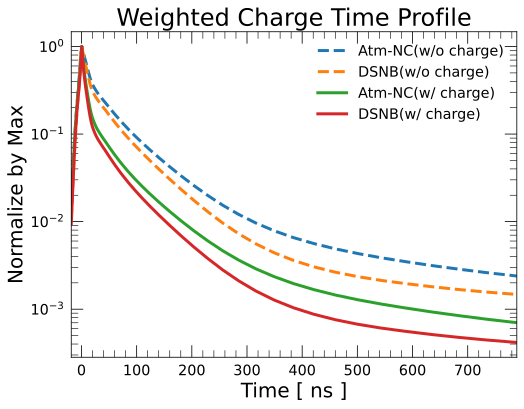

In [12]:
bins = np.array([-19, -18, -17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6,
                 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46,
                 48, 50, 52, 54, 56, 58, 60, 62, 66, 72, 80, 90, 102, 116, 132, 150, 170, 192, 216, 242, 270, 300, 332, 366,
                 402, 440, 480, 522, 566, 612, 660, 710, 762, 816])
from HistTools import GetBinCenter
# print(dir_events["tag"])
dir_h_time_mean = {}

dir_h_time_mean["Atm-NC(w/o charge)"] = np.mean(dir_events["h_time_without_charge"][dir_events["tag"]==0], axis=0)
dir_h_time_mean["DSNB(w/o charge)"] = np.mean(dir_events["h_time_without_charge"][dir_events["tag"]==1], axis=0)

dir_h_time_mean["Atm-NC(w/ charge)"] = np.mean(dir_events["h_time_with_charge"][dir_events["tag"]==0], axis=0)
dir_h_time_mean["DSNB(w/ charge)"] = np.mean(dir_events["h_time_with_charge"][dir_events["tag"]==1], axis=0)

dir_h_time_mean_concat = {}
dir_h_time_mean_concat["Atm-NC"] = np.concatenate((np.mean(dir_events["h_time_without_charge"][dir_events["tag"]==0], axis=0),
                                            np.mean(dir_events["h_time_with_charge"][dir_events["tag"]==0],axis=0),
                                            [np.mean(dir_events["r3"][dir_events["tag"]==0])] ))
dir_h_time_mean_concat["DSNB"] = np.concatenate((np.mean(dir_events["h_time_without_charge"][dir_events["tag"]==1], axis=0),
                                            np.mean(dir_events["h_time_with_charge"][dir_events["tag"]==1],axis=0),
                                            [np.mean(dir_events["r3"][dir_events["tag"]==1])] ))
# print(h_time_atm)
plt.figure("with charge")
plt.figure("without charge")
for key, h_time in dir_h_time_mean.items():
    # plt.figure("without charge" if "w/o" in key else "with charge")
    line_style = "--" if "w/o" in key else "-"
    # line_style = "-"
    # plt.plot(GetBinCenter(bins), h_time/np.diff(bins)/np.max(h_time/np.diff(bins)),label=key.split("(")[0],linestyle=line_style)
    plt.plot(GetBinCenter(bins), h_time/np.diff(bins)/np.max(h_time/np.diff(bins)),label=key,linestyle=line_style)
    plt.semilogy()
    plt.legend()
    plt.xlabel("Time [ ns ]")
    plt.ylabel("Normalize by Max")
    plt.title("Without Weighted Charge Time Profile" if "w/o" in key else "Weighted Charge Time Profile")
    bins_center = GetBinCenter(bins)
    plt.xlim(min(bins_center), max(bins_center) )

# Input for sklearn

[-18.5 789. ]


Text(0.5, 1.0, 'PSD Input')

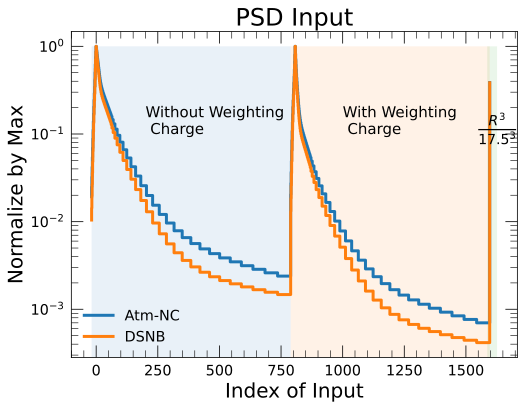

In [13]:
bin_center = GetBinCenter(bins)

for i, (key, h_time) in enumerate( dir_h_time_mean_concat.items() ):
    v_constant_bin_width = np.concatenate([np.diff(bins)*np.max(h_time[:len(bins)-1]/np.diff(bins) ),
                                           np.diff(bins)*np.max(h_time[len(bins)-1:-1]/np.diff(bins)), [17.5**3]])
    plt.step(np.concatenate([bin_center,bin_center[-1]-bin_center[0]+bin_center, [bin_center[-1]*2-bin_center[0]] ]),
             h_time/v_constant_bin_width,label=key)
    # plt.plot( h_time/v_constant_bin_width,label=key)
    # if i==0:
    #     plt.xticks(range(len(v_constant_bin_width)))
plt.fill_between(bin_center[[0, -1]], 1, alpha=0.1)
plt.fill_between((bin_center[-1]-bin_center[0]+bin_center)[[0, -1]], 1, alpha=0.1)
plt.fill_between([bin_center[-1]*2-bin_center[0]-10, bin_center[-1]*2-bin_center[0]+30], 1, alpha=0.1)
plt.text(200, 0.1, "Without Weighting \n Charge",size=15)
plt.text(1000, 0.1, "With Weighting \n Charge",size=15)
plt.text(1550, 0.1, r"$\frac{R^3}{17.5^3}$",size=20)
print(bin_center[[0,-1]])
plt.semilogy()
plt.legend()
plt.xlabel("Index of Input")
plt.ylabel("Normalize by Max")
plt.title("PSD Input")

[]

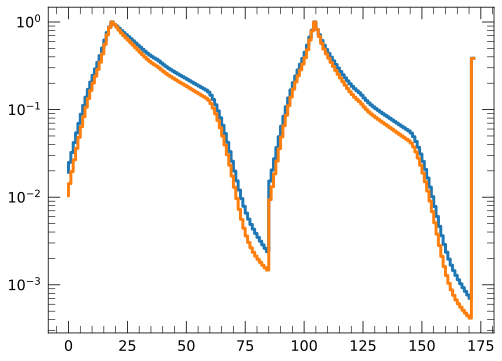

In [14]:
for key, h_time in dir_h_time_mean_concat.items():
    v_constant_bin_width = np.concatenate([np.diff(bins)*np.max(h_time[:len(bins)-1]/np.diff(bins) ),
                                           np.diff(bins)*np.max(h_time[len(bins)-1:-1]/np.diff(bins)), [17.5**3]])
    plt.step(range(len(h_time)),h_time/v_constant_bin_width,label=key)
plt.semilogy()

# TMVA Results

No handles with labels found to put in legend.


dict_keys(['fileid', 'evtID', 'eleID', 'Eqe', 'r3', 'r_xy', 'zz', 'r3_true', 'h_time_without_charge', 'h_time_with_charge', 'id_tag', 'isoz', 'ison', 'tag', 'PSD'])
Cannot get dir_n_samples!!! You need to set it by hand !!Continue
Cannot get dir_train!!! You need to set it by hand !!Continue


<Figure size 576x432 with 0 Axes>

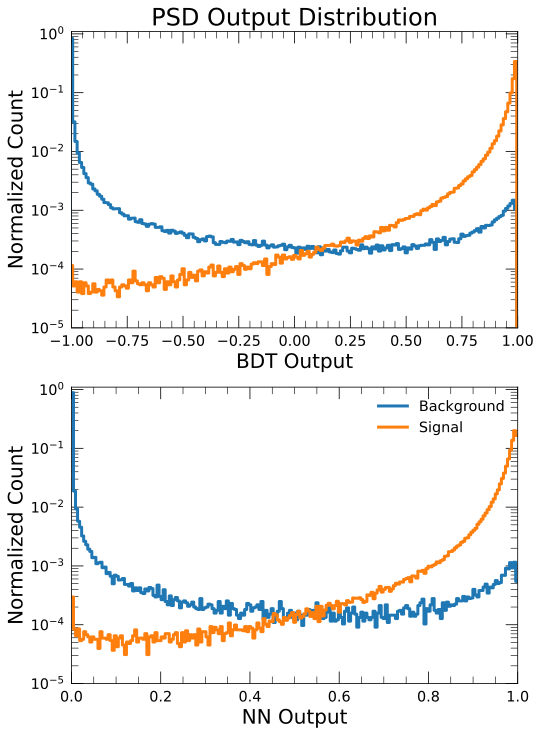

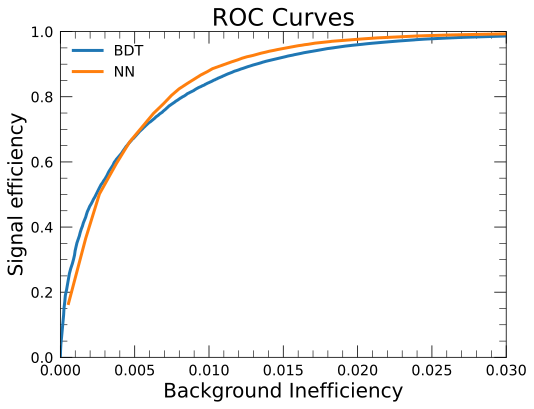

In [15]:
from importlib import reload
import DiscriminationTools
import HistTools
reload(HistTools)
reload(DiscriminationTools)
from DiscriminationTools import DiscriminationTools
from HistTools import PlotHistNormByHits
discrimination_tool = DiscriminationTools()
discrimination_tool.key_Energy = "Eqe"
discrimination_tool.key_tag = "tag"
discrimination_tool.GetPredictionData("/afs/ihep.ac.cn/users/l/luoxj/sk_psd/model_PSDTools/predict_Combine.npz")

fig, axes = plt.subplots(2,1, figsize=(8,12))

# Plot PSD Distribution
discrimination_tool.GetPSDDistribution(bins=np.linspace(0, 1, 220),ax=axes[1])
dir_hist_PSD = discrimination_tool.dir_hist_PSD
axes[1].set_ylim(1e-5, 1.1)
from importlib import reload
import HistTools
reload(HistTools)
from HistTools import GetBinCenter,ReBin

# Load BDT Results
with up.open("/afs/ihep.ac.cn/users/l/luoxj/sk_psd/results_TMVA_chengjie/output_hist_fv1_all.root") as f:
    bkg_ineff, sig_eff =  f["XncYdsnb_eff"].values()
    PSDVal_atm, bins_atm = f["h1_atm"].to_numpy()
    PSDVal_DSNB,bins_DSNB = f["h1_dsnb"].to_numpy()


bins_center_atm_rebin, PSDVal_atm_rebin = ReBin(GetBinCenter(bins_atm), PSDVal_atm,n_bins_to_merge=20)
bins_center_DSNB_rebin, PSDVal_DSNB_rebin = ReBin(GetBinCenter(bins_DSNB), PSDVal_DSNB,n_bins_to_merge=20)
axes[0].step(bins_center_atm_rebin,PSDVal_atm_rebin/np.sum(PSDVal_atm_rebin), where="mid",)
axes[0].step(bins_center_DSNB_rebin,PSDVal_DSNB_rebin/np.sum(PSDVal_DSNB_rebin), where="mid")
axes[0].set_xlim(-1,1)
axes[0].set_ylim(1e-5, 1.1)
axes[0].set_xlabel("BDT Output")
axes[0].set_ylabel("Normalized Count")
axes[0].semilogy()
axes[0].legend()
axes[0].set_title("PSD Output Distribution")


# Plot ROC Curves
plt.figure()

ax = plt.subplot(111)
ax.plot( bkg_ineff, sig_eff, label="BDT")

discrimination_tool.PlotROCCurves(xlim=(0,0.03), ylim=(0,1), label="NN", ax=ax)

Text(0, 0.5, 'Normalized Count')

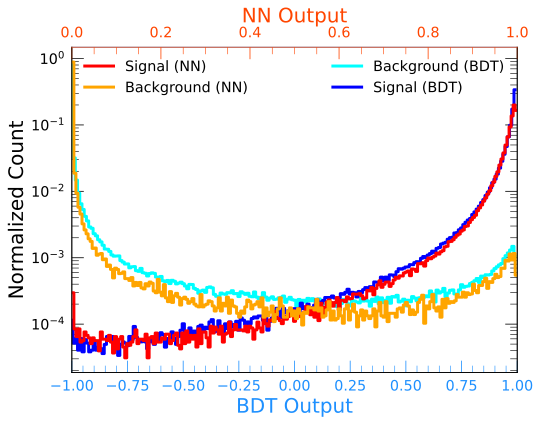

In [16]:
fig, ax1 = plt.subplots()
index = (bins_center_atm_rebin>-1) & (bins_center_atm_rebin<1)
ax1.step(bins_center_atm_rebin[index],PSDVal_atm_rebin[index]/np.sum(PSDVal_atm_rebin), where="mid",
         color="cyan",ls="-",label="Background (BDT)")
ax1.step(bins_center_DSNB_rebin[index],PSDVal_DSNB_rebin[index]/np.sum(PSDVal_DSNB_rebin), where="mid",
         color="blue",ls="-",label="Signal (BDT)" )
ax2 = ax1.twiny()
ax1.semilogy()
ax2.step(GetBinCenter(dir_hist_PSD[1][1]), dir_hist_PSD[1][0], where="mid", color="red", ls="-",
         label="Signal (NN)")
ax2.step(GetBinCenter(dir_hist_PSD[0][1]), dir_hist_PSD[0][0], where="mid", color="orange", ls="-",
         label="Background (NN)")
ax2.set_xlim(0,1)
ax1.set_xlim(-1,1)

ax2.set_xlabel("NN Output")
ax1.set_xlabel("BDT Output")

axis_color = "orangered"
ax2.spines['top'].set_color(axis_color)
ax2.xaxis.label.set_color(axis_color)
ax2.tick_params(axis='x', which='both', colors=axis_color)

axis_color = "dodgerblue"
ax1.spines['top'].set_color(axis_color)
ax1.xaxis.label.set_color(axis_color)
ax1.tick_params(axis='x', which='both', colors=axis_color)

ax1.legend()
ax2.legend(loc="upper left")
ax1.set_ylabel("Normalized Count")


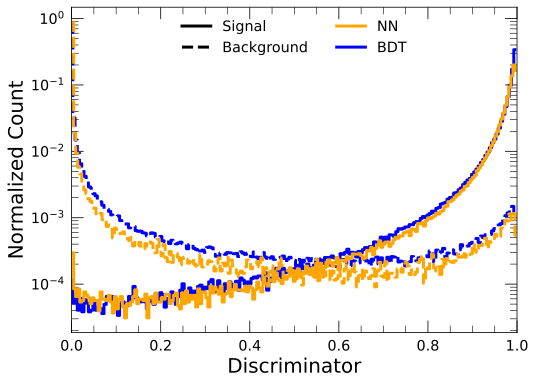

In [17]:
import seaborn as sns
fig, ax1 = plt.subplots()
c_NN = "orange"
c_BDT = "blue"
index = (bins_center_atm_rebin>-1) & (bins_center_atm_rebin<1)
ax1.step(bins_center_atm_rebin[index]/2+0.5,PSDVal_atm_rebin[index]/np.sum(PSDVal_atm_rebin), where="mid",
         color=c_BDT,ls="--") #,label="Background (BDT)"
ax1.step(bins_center_DSNB_rebin[index]/2+0.5,PSDVal_DSNB_rebin[index]/np.sum(PSDVal_DSNB_rebin), where="mid",
         color=c_BDT,ls="-" ) #,label="Signal (BDT)"
ax1.semilogy()
ax1.step(GetBinCenter(dir_hist_PSD[1][1]), dir_hist_PSD[1][0], where="mid", color=c_NN, ls="-") # NN Signal
ax1.step(GetBinCenter(dir_hist_PSD[0][1]), dir_hist_PSD[0][0], where="mid", color=c_NN, ls="--") # NN Background
ax1.set_xlim(0,1)

ax1.set_xlabel("Discriminator")
ax1.set_ylabel("Normalized Count")
# ax1.legend()
dummy_lines = []
for ls, label in zip(["-", "--"], ["Signal", "Background"]):
    ax1.plot([],[], c="black", ls=ls, label=label)
for color, label in zip([c_NN, c_BDT], ["NN", "BDT"]):
    ax1.plot([],[], c=color, label=label)
ax1.legend(loc="upper center", ncol=2 )


In [18]:
print( dir_events[""] )

KeyError: ''